   #        CUSTOMER CHURN PREDICTION
   
   **By: Emmanuella Sule**

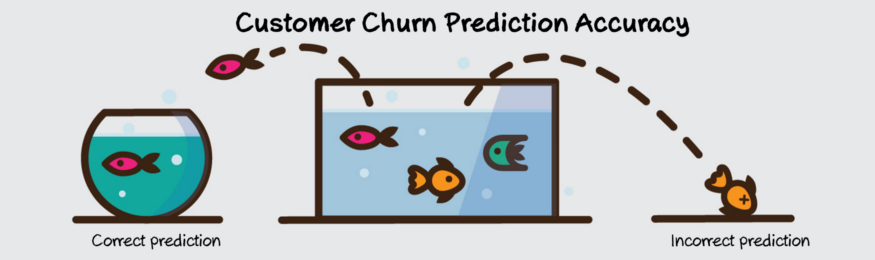

This project is about predicting whether a customer will change telecommunications provider, something known as "churning".  

This project is a kaggle competition and thus the [dataset](https://www.kaggle.com/competitions/customer-churn-prediction-2020) used is gotten from Kaggle

The dataset contains 4250 Observations, 19 features and 1 boolean variable "churn" which is the target variable, indicates the class of the observation. 

**Import all necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

 ## **Preprocessing 1:**
 - Data collection
 - Inspecting the Data
 - Missing data handling
 - Initial feature extraction and selection
 - Feature transformation

**reads the customer churn dataset**

In [3]:
data = pd.read_csv("C:\\Users\\Nene\\Downloads\\train.csv")

In [4]:
# returns the first 5 rows of the dataset
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


**returns information about each columns**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

**check for missing or NAN values**

In [6]:
data.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

**maps and then convert a list of columns from object to category datatype**

In [7]:
columns = ["international_plan","voice_mail_plan","churn"]
mapping = {"yes":1,"no":0}
for i in columns:

    data[i] = data[i].map(mapping)
    data[i] = data[i].astype("category")

**confirms the columns transformation in the preceeding code was successful**

In [8]:
data[["international_plan","voice_mail_plan","churn"]].dtypes

international_plan    category
voice_mail_plan       category
churn                 category
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          4250 non-null   object  
 1   account_length                 4250 non-null   int64   
 2   area_code                      4250 non-null   object  
 3   international_plan             4250 non-null   category
 4   voice_mail_plan                4250 non-null   category
 5   number_vmail_messages          4250 non-null   int64   
 6   total_day_minutes              4250 non-null   float64 
 7   total_day_calls                4250 non-null   int64   
 8   total_day_charge               4250 non-null   float64 
 9   total_eve_minutes              4250 non-null   float64 
 10  total_eve_calls                4250 non-null   int64   
 11  total_eve_charge               4250 non-null   float64 
 12  total_night_minutes            425

**select the feature/predictor and the target/response variables from the dataset**

In [10]:
X = data.drop(labels=["area_code","state"],axis=1)

y = data.churn.values

## **Preprocessing 2:**
- Feature scaling

**uses the make_column_selector class to exclude columns with datatype "category" from being scalled by the StandardScaler class.**

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector


c_transform = ColumnTransformer([("scaler", StandardScaler(), make_column_selector(dtype_exclude="category")), 
                                 ("nothing","passthrough",make_column_selector(dtype_include="category"))])
X = c_transform.fit_transform(X)


In [12]:
#returns a processed dataset
X

array([[0.17039881925861888, 1.3668569691072225, -0.3455096394306418,
        ..., 0, 1, 0],
       [0.9261856924052797, -0.5679114301286462, 1.169136360774426, ...,
        0, 0, 0],
       [-0.4090377834871544, -0.5679114301286462, 2.206057827907479, ...,
        1, 0, 0],
       ...,
       [-0.6357738454311527, -0.5679114301286462, -0.17700990102152067,
        ..., 0, 0, 0],
       [-1.2655962397200367, 2.4086553379265365, 1.0265596590436308, ...,
        0, 1, 0],
       [-0.3586519919440437, 1.962170322718259, -0.9417394830321474, ...,
        0, 1, 0]], dtype=object)

**splits the processed dataset into X, y train and test dataset**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify=y, random_state=1)

In [14]:
# print the class distribution across the test and train dataset
print(np.bincount(y_test))
print(np.bincount(y_train))


[1096  179]
[2556  419]


### **Machine Learning Algorithm**  :
**Building a predictive model with the LogisticRegression algorithm**

**Initialise a Logisticregression class, and fit the X and y train dataset**

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver="lbfgs", multi_class="multinomial")
lr.fit(X_train,y_train)

LogisticRegression(C=100.0, multi_class='multinomial')

## **Evaluating Model Performance**

**Using cross validation technique to get an estimate of the model performance, that is, how well the model performs on unseen data**

In [18]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(estimator=lr, X=X_train, y=y_train,cv=10, n_jobs=1)

In [19]:
# print cv accuracy of each folds
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
print(f"cv accuracy {np.mean(scores):.3f}" f"+/- {np.std(scores):.3f}")

cv accuracy 1.000+/- 0.000


**predicts the unseen X_test dataset**

In [21]:
y_pred = lr.predict(X_test)

**print test dataset accuracy**

In [22]:
lr.score(X_test,y_test)

1.0

**Plots a confusion matrix**

In [24]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,y_pred)

**displays a visual representation of the confusion matrix using Matplotlib's matshow function**

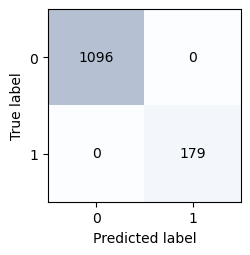

In [26]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(con_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        ax.text(x=j, y=i, s=con_mat[i,j], va="center", ha="center")
        
ax.xaxis.set_ticks_position("bottom")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

**Using learning curve to diagnose whether a learning algorithm 
has a problem with overfitting (high variance) or underfitting (high bias)**

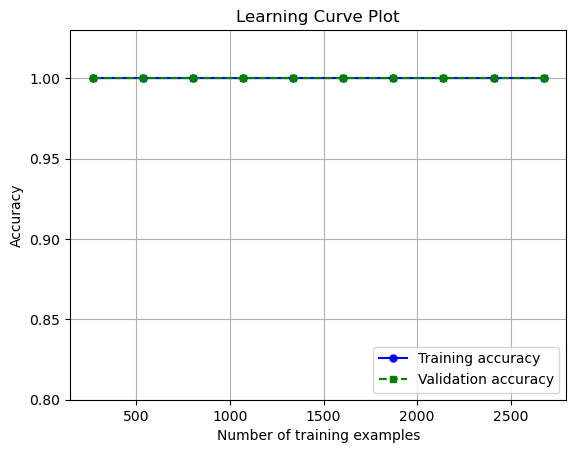

In [27]:
# ploting a learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = \
            learning_curve(estimator=lr, X=X_train, y=y_train,
                           train_sizes=np.linspace(0.1,1.0,10), 
                           cv=10, n_jobs=1)



train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std =  np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color="blue", marker="o",markersize=5, label="Training accuracy")
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                train_mean - train_std, 
                alpha=0.15, color="blue")

plt.plot(train_sizes, test_mean, color="green", marker="s",markersize=5, linestyle="--", label="Validation accuracy")
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                test_mean - test_std, 
                 alpha=0.15, color="green")

plt.grid()
plt.title("Learning Curve Plot")
plt.xlabel("Number of training examples")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.8, 1.03])
plt.show()

**Using Validation curve for improving the performance of the model by addressing overfitting or underfitting issues.**

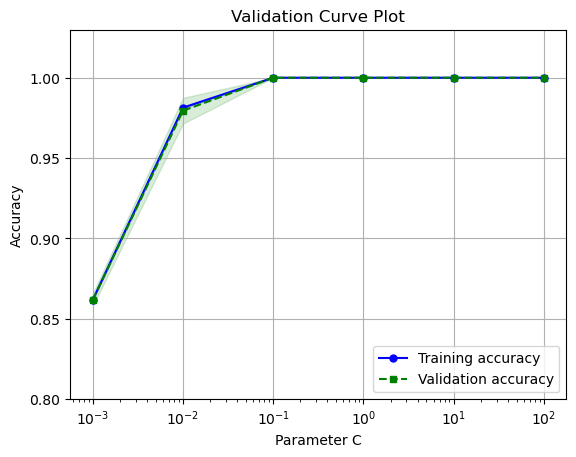

In [28]:
#plot a validation curve
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=lr, 
                                             X=X_train, y=y_train,
                                             param_name='C',
                                             param_range=param_range,
                                             cv=10)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std =  np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color="blue", marker="o",markersize=5, label="Training accuracy")
plt.fill_between(param_range, 
                 train_mean + train_std,
                train_mean - train_std, 
                alpha=0.15, color="blue")

plt.plot(param_range, test_mean, color="green", marker="s",markersize=5, linestyle="--", label="Validation accuracy")
plt.fill_between(param_range, 
                 test_mean + test_std,
                test_mean - test_std, 
                 alpha=0.15, color="green")

plt.grid()
plt.xscale("log")
plt.title("Validation Curve Plot")
plt.xlabel("Parameter C")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.ylim([0.8, 1.03])
plt.show()

**In the preceeding figure, the differences in the accuracy for varying values of C are subtle, we can see that the model 
slightly underfits the data when we increase the regularization strength (small values of C). However, 
for large values of C, it means lowering the strength of regularization, so the model tends to slightly 
overfit the data. In this case, the sweet spot appears to be between 0.01 and 0.1 of the C value.
But for this project, i maintain a C value of 100 since the Training and Validation accuracy curves follows closely.**  



**END!**